# Libraries

In [3]:
import os
import torch
from PIL import Image
from model import TinyYoloV2
from utils import *

# Model

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
def load_model(weights=None):
    """ loading pretrainde weights to built model"""
    model = TinyYoloV2()
    if weights:
       model.load_weights(weights)
       #model.load_state_dict (torch.load (weights))
    return model.to(device)

In [38]:
# downloading pretrained weights from source
!wget https://pjreddie.com/media/files/yolov2-tiny-voc.weights

--2021-09-22 17:11:26--  https://pjreddie.com/media/files/yolov2-tiny-voc.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63471556 (61M) [application/octet-stream]
Saving to: ‘yolov2-tiny-voc.weights.1’

yolov2-tiny-voc.wei 100%[===================>]  60.53M  47.9MB/s    in 1.3s    

2021-09-22 17:11:28 (47.9 MB/s) - ‘yolov2-tiny-voc.weights.1’ saved [63471556/63471556]



In [6]:
model = load_model(weights = '/content/yolov2-tiny-voc.weights')
print(model)

TinyYoloV2(
  (cnn): Sequential(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (leaky1): LeakyReLU(negative_slope=0.1, inplace=True)
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (leaky2): LeakyReLU(negative_slope=0.1, inplace=True)
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (leaky3): LeakyReLU(negative_slope=0.1, inplace=True)
    (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, c

In [7]:
class_names = ['aeroplane', 'bicycle', 'bird', 'boat', 'bottle',
               'bus', 'car', 'cat', 'chair', 'cow', 'diningtable',
               'dog', 'horse', 'motorbike', 'person', 'pottedplant',
               'sheep', 'sofa', 'train', 'TVmonitor']

# Prediction

In [35]:
def predict(model, img_path, save_to=None):
    assert os.path.exists(img_path), 'Error! Input image does not exists.'
    model.eval()
    img = Image.open(img_path).convert('RGB')
 
    tic = time.time()
    # finding and filtering boxes
    boxes = filtered_boxes(model, img.resize((416, 416)), conf_thresh=0.66, nms_thresh=0.55, device=device)
 
    toc = time.time()
    print('Prediction took {:.5f} ms.'.format((toc - tic) * 1000))
    # visualize image and bboxes
    pred_img = plot_boxes(img, boxes, save_to, class_names)
   
    return pred_img

Prediction took 35.14481 ms.


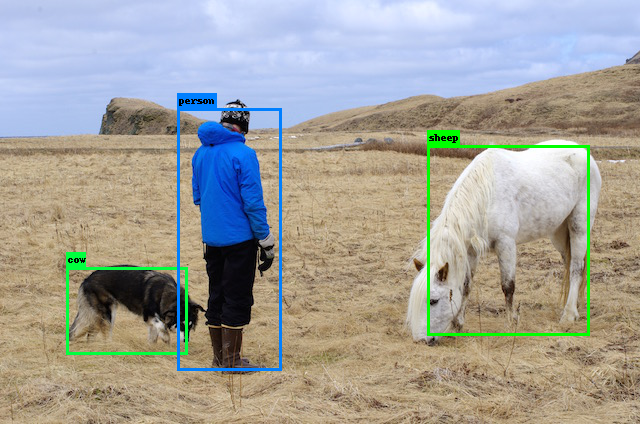

In [37]:
predict(model, '/content/person.jpg')

Prediction took 35.67672 ms.


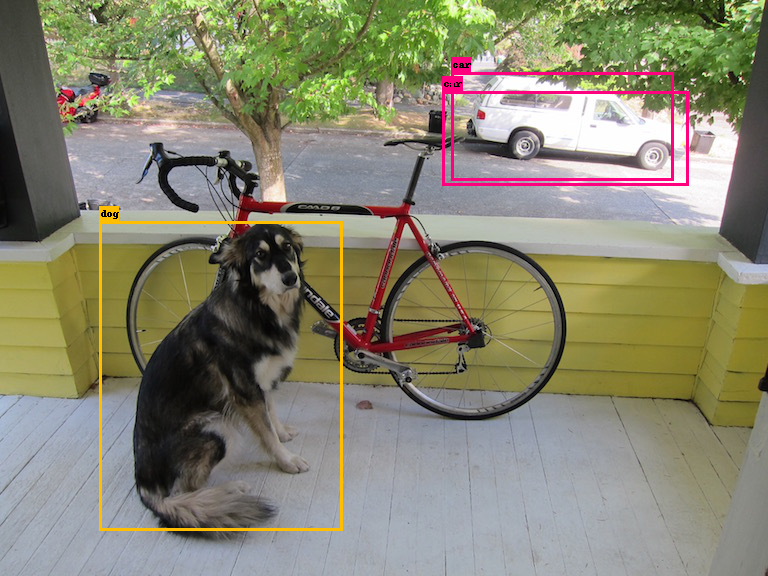

In [36]:
predict(model, '/content/drive/MyDrive/dog.jpg')

Prediction took 32.77826 ms.


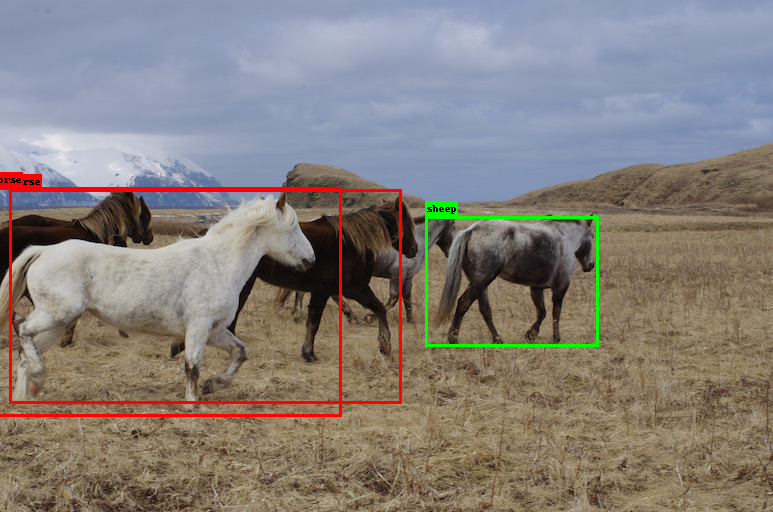

In [34]:
predict(model, '/content/horses.jpg')